# Prosper Loan Data Exploration
## by Olaoluwa Ebiekuraju

## Introduction
> This document explore the dataset containing the loan amount, prosper rating and the factors related to them for about 114,000 Prosper loans

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Display everything in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_rows', None)

In [3]:
#load the dataset and the data dictionary
dt_dict = pd.read_excel('prosper_loan_dict.xlsx') # data dictionary
df_loan = pd.read_csv('prosper_loan.csv') # dataset

In [4]:
# high-level overview of data shape and composition
print(df_loan.shape)
print('\n')
print(df_loan.dtypes)
print('\n')
df_loan.head()

(113937, 81)


ListingKey                             object 
ListingNumber                          int64  
ListingCreationDate                    object 
CreditGrade                            object 
Term                                   int64  
LoanStatus                             object 
ClosedDate                             object 
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                  object 
ProsperScore                           float64
ListingCategory (numeric)              int64  
BorrowerState                          object 
Occupation                             object 
EmploymentStatus                       object 
EmploymentStatusDuration               float6

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# Structure of the dataset
print('There are ' +  str(df_loan.shape[0]) + ' rows and ' + str(df_loan.shape[1]) + ' columns')
print('\n')
dt_dict

There are 113937 rows and 81 columns




,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the 'key' used in the listing object in the API."
1,ListingNumber,The number that uniquely identifies the listing to the public as displayed on the website.
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket."
6,ClosedDate,"Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) for the loan.
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.


In [6]:
# Variables that are not useful for this investigation. (40 of them)
var = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 
       'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'OpenRevolvingMonthlyPayment', 'LoanOriginationDate',
       'InquiriesLast6Months', 'TotalInquiries', 'PublicRecordsLast12Months', 'BankcardUtilization',
       'TotalTrades','TradesOpenedLast6Months','TradesNeverDelinquent (percentage)','LoanKey', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
       'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'MemberKey','LoanFirstDefaultedCycleNumber','LoanNumber','LP_CustomerPayments','LP_CustomerPrincipalPayments',
       'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_NonPrincipalRecoverypayments',
       'LP_NetPrincipalLoss','LP_GrossPrincipalLoss','Recommendations','LoanCurrentDaysDelinquent',
       'PercentFunded','InvestmentFromFriendsCount','InvestmentFromFriendsAmount']

df_loan = df_loan.drop(var, axis=1)

In [7]:
# Changing all Full-time, Part-time and self-employed employment status to employed
df_loan['Employment'] = df_loan['EmploymentStatus'].replace(['Full-time','Part-time','Self-employed'],
                                      ['Employed','Employed','Employed'])

# Changing the income range for those not employed to $0
df_loan['IncomeRange'].replace('Not employed','$0', inplace=True)

# Extracting ony the quarters 
df_loan['Quarter'] = df_loan['LoanOriginationQuarter'].str.extract(r'(Q\d)')

# creating a Listing category with the actual values
df_loan['ListingCategory(Alpha)'] = df_loan['ListingCategory (numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,
                                                                                  15,16,17,18,19,20],
                                             ['Not Available', 'Debt Consolidation','Home Improvement','Business',
                                              'Personal Loan','Student Use', 'Auto', 'Other', 'Baby&Adoption','Boat',
                                              'Cosmetic Procedure','Engagement Ring', 'Green Loans', 'Household Expenses',
                                              'Large Purchases', 'Medical/Dental','Motorcycle', 'RV', 'Taxes', 'Vacation', 
                                              'Wedding Loans'])

In [8]:
# convert CreditGrade, ProsperRating (Alpha),ListingCategory(Alpha), LoanOriginationQuarter, Quarter,
# and IncomeRange into ordered categorical types
cat_var = {'CreditGrade': ['NC','HR','E','D','C','B','A','AA'],
           'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
           'ListingCategory(Alpha)': ['Not Available', 'Debt Consolidation','Home Improvement','Business',
                                      'Personal Loan','Student Use', 'Auto', 'Other', 'Baby&Adoption','Boat',
                                      'Cosmetic Procedure','Engagement Ring', 'Green Loans', 'Household Expenses',
                                      'Large Purchases', 'Medical/Dental','Motorcycle', 'RV', 'Taxes', 'Vacation', 
                                      'Wedding Loans'],
           'LoanOriginationQuarter': ['Q4 2005','Q1 2006','Q2 2006','Q3 2006','Q4 2006','Q1 2007','Q2 2007','Q3 2007',
                                      'Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q1 2009','Q2 2009','Q3 2009',
                                      'Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011', 'Q3 2011',
                                      'Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013','Q3 2013',
                                      'Q4 2013','Q1 2014'],
           'Quarter': ['Q1','Q2','Q3','Q4'],
           'IncomeRange':['Not displayed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'] }

for var in cat_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = cat_var[var])
    df_loan[var] = df_loan[var].astype(ordered_var)

### What is the structure of your dataset?
There are 113937 rows and 81 columns and I am definitely not using all the features for this investigation. Most variables are numeric in nature, but the variables CreditGrade, ProsperRating (Alpha),ListingCategory(Alpha), LoanOriginationQuarter, Quarter, and IncomeRange are ordered factor variables with the following levels.

CreditGrade: NC, HR, E, D, C, B, A, AA.

ProsperRating (Alpha): HR, E, D, C, B, A, AA

ListingCategory(Alpha): Not Available, Debt Consolidation, Home Improvement, Business,
                          Personal Loan, Student Use, Auto, Other, Baby&Adoption, Boat,
                          Cosmetic Procedure, Engagement Ring, Green Loans, Household Expenses
                          Large Purchases, Medical/Dental, Motorcycle, RV, Taxes, Vacation, Wedding Loans
                          
LoanOriginationQuarter: Q4 2005, Q1 2006, Q2 2006, Q3 2006, Q4 2006, Q1 2007, Q2 2007, Q3 2007,
                        Q4 2007, Q1 2008, Q2 2008, Q3 2008, Q4 2008, Q1 2009, Q2 2009, Q3 2009,
                        Q4 2009, Q1 2010, Q2 2010, Q3 2010, Q4 2010, Q1 2011, Q2 2011, Q3 2011,
                        Q4 2011, Q1 2012, Q2 2012, Q3 2012, Q4 2012, Q1 2013, Q2 2013, Q3 2013,
                        Q4 2013, Q1 2014  
                        
Quarter: Q1, Q2, Q3, Q4

IncomeRange:'Not displayed',0, 1-24,999, 25,000-49,999, 50,000-74,999,  75,000-99,999, 100,000+ (US dollar)

### What is/are the main feature(s) of interest in your dataset?
I am mostly i nterested in features related with the Prosper ratings and those associated with the amount of loan borrowed.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the Monthly Income, owning a home and credit ratings will have some relatioship with the amount borrowed. I also think that that Prosper rating will be somehow related to the mentioned features and also to the loan status.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Prosper ratings and Loan amount.

In [9]:
# functions for plotting the bar charts
def bar_plot(r,c,p,s):
    plt.subplot(r,c,p)
    base_color = sb.color_palette()[0]
    sb.countplot(data=df_loan, y=s, color=base_color);
    

# Has too many categories    
def plenty_bars(w,h,r,c,p,s,t=False):
    plt.figure(figsize=[w,h])
    plt.subplot(r,c,p)
    base_color = sb.color_palette()[0]
    sb.countplot(data=df_loan, x=s, color=base_color);
    t = plt.xticks(rotation=90);    

##### The Prosper Rating

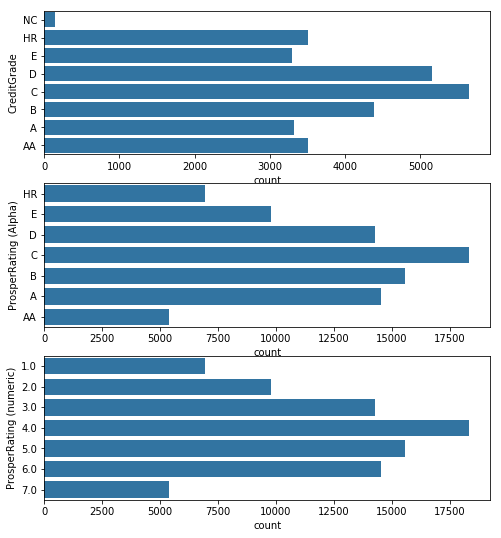

In [10]:
# The Prosper ratings before 2009 (CreditGrade) and from 2009 third quater(Prosper Rating)

plt.figure(figsize=[8,9])

#before 2009 (CreditGrade)
bar_plot(3,1,1, 'CreditGrade')

#from 2009 third quater(Prosper Rating). Making sure the two columns are the same.
bar_plot(3,1,2, 'ProsperRating (Alpha)')
bar_plot(3,1,3, 'ProsperRating (numeric)')

>The the distributions of the ratings before and after 2009 are similar, clients with the average rating (C or 4) being the highest. However, the proportion of the extreme ratings -high(AA or 7) and Low(HR or 1)- before 2009 were more as compared to after 2009. Finally, the NC(0) rating has been eliminated after 2009.

In [11]:
# Creating functions to plot Histograms to avoid too many repetitions

# for continuous variables    
def hist_plot(r,c,p,s,bs):
    plt.subplot(r,c,p)
    bins= np.arange(min(df_loan[s]),max(df_loan[s])+bs,bs )
    plt.hist(data=df_loan, x=s, bins=bins);
    plt.xlabel(s)
    plt.ylabel('Frequency')
    
# ploting for continuous variables and setting limits     
def hist_plot_lim(r,c,p,s,bs,sl,ll):
    plt.subplot(r,c,p)
    bins= np.arange(min(df_loan[s]),max(df_loan[s])+bs,bs )
    plt.hist(data=df_loan, x=s, bins=bins);
    plt.xlabel(s)
    plt.ylabel('Frequency')
    plt.xlim((sl,ll)); 

In [12]:
# Loop in a fuction to drop nan values for each of the columns below to avoid NaN error in the histogram plotting

def drop_null():
    num_var = ['BorrowerAPR','EstimatedLoss', 'EstimatedReturn', 'CreditScoreRangeLower', 'DebtToIncomeRatio',
             'LoanOriginalAmount','ProsperRating (numeric)','ProsperScore']
    for var in num_var:
        df_loan[var].dropna(inplace=True)

##### Amount borrowed

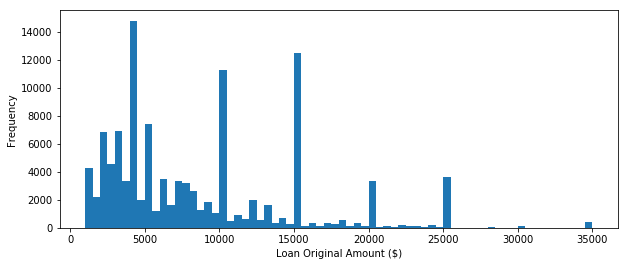

In [13]:
# Amount($) of Loan borrowed
plt.figure(figsize=[10,4])
hist_plot(1,1,1,'LoanOriginalAmount',500)
plt.xlabel('Loan Original Amount ($)');

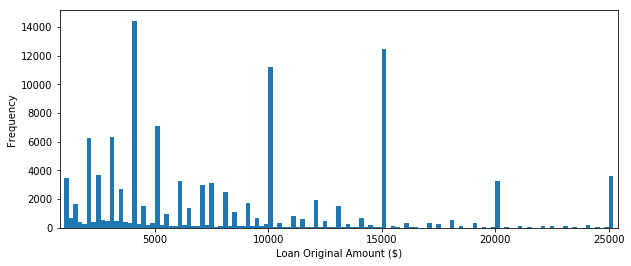

In [14]:
# eliminatig outliers and reducing bin size
plt.figure(figsize=[10,4])
hist_plot_lim(1,1,1,'LoanOriginalAmount',200,800,25400)
plt.xlabel('Loan Original Amount ($)');

>The  amount borrowed has a right long tail with some conspicuous spikes at 2k, 3k, 4k, 5k, 10k, 15k, 20k and 25k.

#####  Monthly Loan Payment 

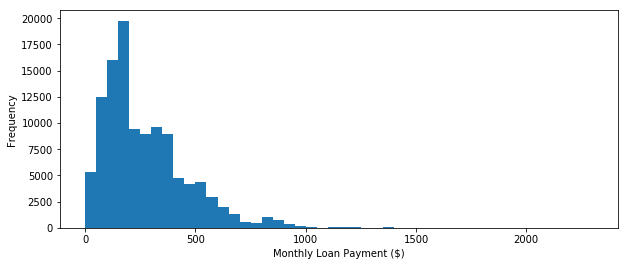

In [15]:
# Ploting the monthly loan payment by the borrower
plt.figure(figsize=[10,4])
hist_plot(1,1,1,'MonthlyLoanPayment',50)
plt.xlabel('Monthly Loan Payment ($)');

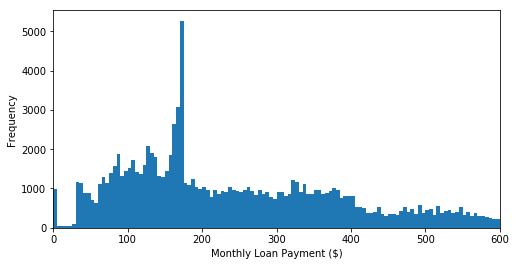

In [16]:
# investigating further by eliminating outliers and reducing the bin size
plt.figure(figsize=[8,4])
hist_plot_lim(1,1,1,'MonthlyLoanPayment',5,0,600)
plt.xlabel('Monthly Loan Payment ($)');

##### Some information about the loan

>The monthly loan payment is positively skewed just like the amount borrowed. The was a spike around $160-180.

In [17]:
# changing all the different past due categories to just past due
df_loan['LoanStatus'] = df_loan['LoanStatus'].replace(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)',
                                                       'Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)'],
                                                      ['Past Due','Past Due','Past Due','Past Due','Past Due','Past Due'])

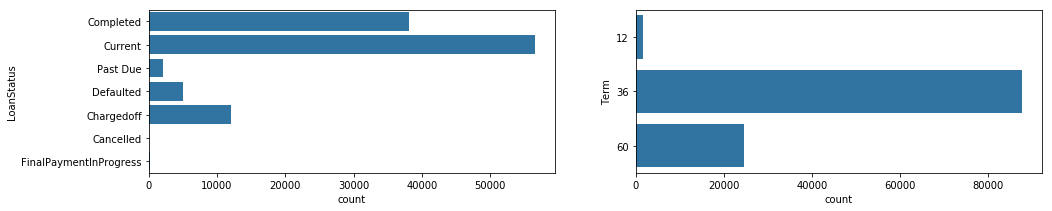

In [18]:
plt.figure(figsize=[16, 3])

# The current status of the loan
bar_plot(1,2,1,'LoanStatus')

# Duration of the loan in months
bar_plot(1,2,2,'Term')

>Most of the loan are either on or completed. However, a good number of the loan (over 15,000 loans) has either been defaulted or charged off.

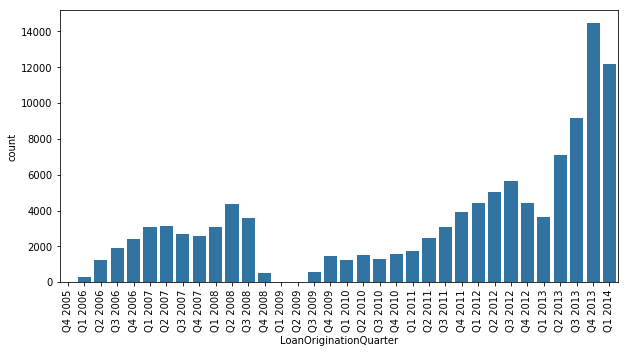

In [19]:
# The count of loan in the different quarters over the years
plenty_bars(10,5,1,1,1,'LoanOriginationQuarter')

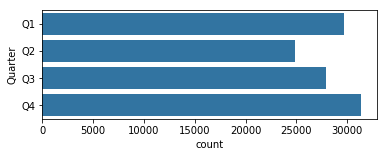

In [20]:
# The count of loan in the different quarters
plt.figure(figsize=[6,2])
bar_plot(1,1,1,'Quarter')

>The data ranged from last quarter of 2005 to first quarter of 2014. Over the years, there was overall gradual increase in the number of loan lended out. There was a little set back in the last two quarters of 2007, and the last and first quarters of 2012 and 2014 respectively, and a major blow in the last quarter of 2008 upto the end of the first half of 2009.

>Generally, number of loan lended out were highest in the first and last quarters.

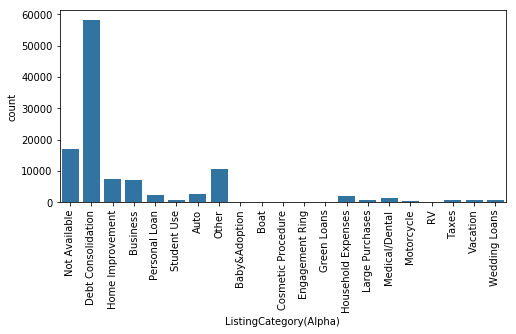

In [21]:
# what loan was used for
plenty_bars(8,12,3,1,3, 'ListingCategory(Alpha)')

>More than half of the loan taken were to be used for debt consolidation.

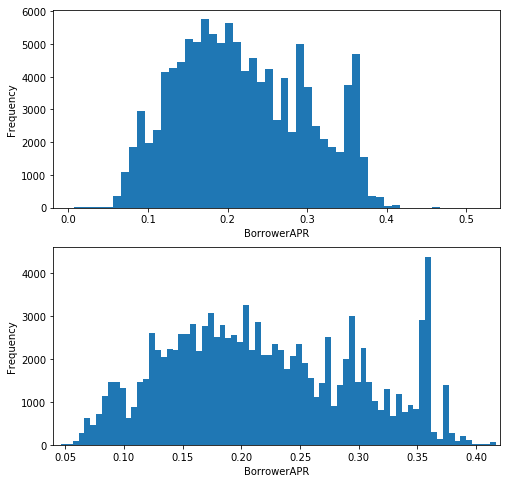

In [22]:
drop_null() # To prevent the Nan error 

plt.figure(figsize=[8,8])
# Ploting the Borrower Annual Percentage Rate
hist_plot(2,1,1,'BorrowerAPR',0.01)

# Reduce the bin size and remove possible outliers
hist_plot_lim(2,1,2,'BorrowerAPR',0.005,0.04,0.42)

>The plot of the Borrowers Annual Percentage Rate showed relatively normal distribution with some notable spikes at the higher end of the supposedly normal distribution.

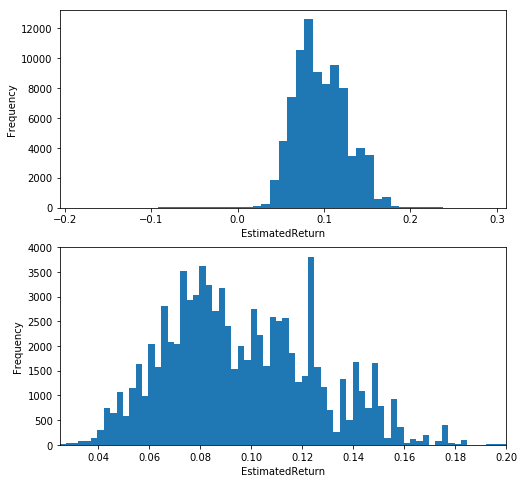

In [23]:
plt.figure(figsize=[8,8])
# Ploting for the estimated Return on the loan
hist_plot(2,1,1,'EstimatedReturn',0.01)

# Eliminate Outliers and reduce bin size
hist_plot_lim(2,1,2,'EstimatedReturn',0.0025,0.025,0.2)

>The Estimated Return has a long left tail which extended to the negative axis. After eliminating outliers and reducing bin size, there plot distribution was normal with an obvious spike at 0.122

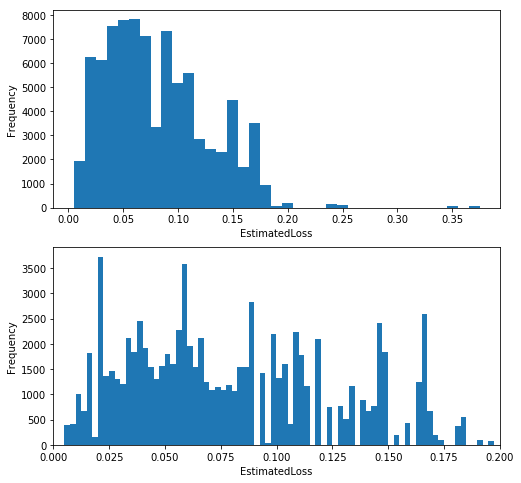

In [24]:
plt.figure(figsize=[8,8])
# Ploting for the estimated Return and Loss on the loan
hist_plot(2,1,1,'EstimatedLoss',0.01)

# Eliminate Outliers and reducing bin size
hist_plot_lim(2,1,2,'EstimatedLoss',0.0025,0,0.2)

>The Estimated Loss is the opposite of the Estimated Return, it was positively skewed and had prominent spikes across the chart after transformation.

##### Some Information about the borrower

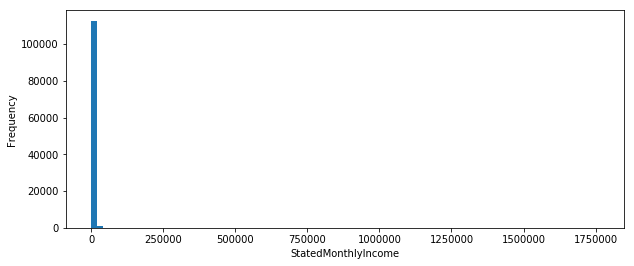

In [25]:
# Plotting monthly income of borrower
plt.figure(figsize=[10,4])
hist_plot(1,1,1,'StatedMonthlyIncome',20000)

In [26]:
# Function to plot log transformed monthly income of borrower
def income_hist_log(bs):
    bins=10**np.arange(0, np.log10(df_loan['StatedMonthlyIncome'].max())+bs,bs)
    plt.hist(data=df_loan, x='StatedMonthlyIncome',bins=bins);
    plt.xlabel('StatedMonthlyIncome (Log Transformed)');
    plt.xscale('log')
    plt.ylabel('Frequency')
    plt.xticks([1, 10, 1e2, 1e3, 1e4, 1e5, 1e6], ['1','10', '100','1k', '10k', '100k', '1M']);

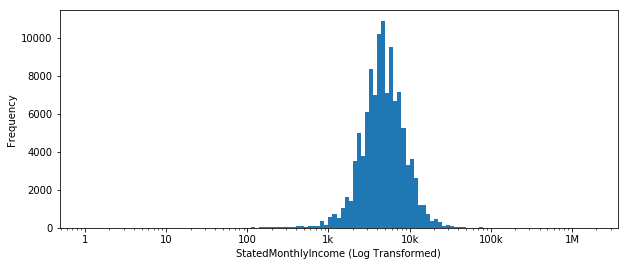

In [27]:
#plot log transformed monthly income of borrower
plt.figure(figsize=[10,4])
income_hist_log(0.05)

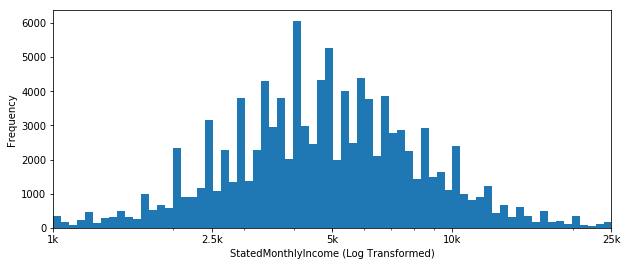

In [28]:
# plot log transformed monthly income of borrower and remove outliers
plt.figure(figsize=[10,4])
income_hist_log(0.02)
plt.xlim((1e3,2.5e4));
plt.xticks([1e3, 2.5e3, 5e3, 1e4, 2.5e4], ['1k','2.5k', '5k', '10k','25k']);

The monthly income of the borrower has a very long tail, almost all of them at the lower end of the monthly income. When plotted on a log scale and outliers were eliminated, majority earns between 2k-10k monthy. 

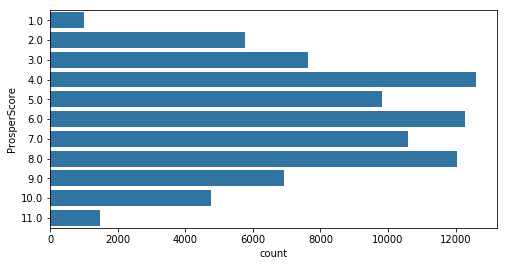

In [29]:
plt.figure(figsize=[8,4])
# ploting the distribution of the Prosper Score
bar_plot(1,1,1,'ProsperScore')

> Similar to the Rating, the middle scores are more common among the borrowers as compared to the extreme scores

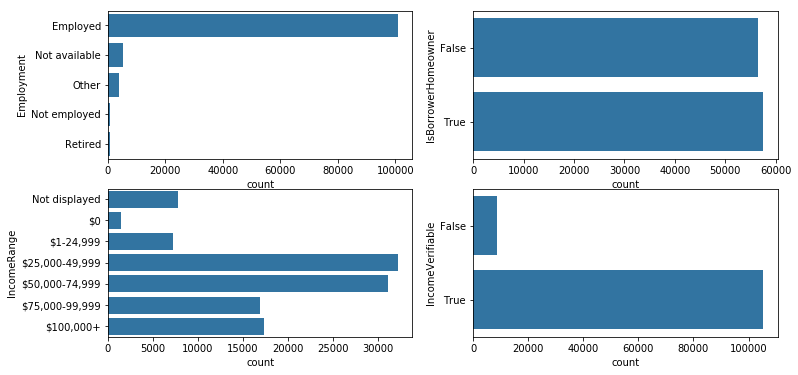

In [30]:
plt.figure(figsize=[12,6])
bar_plot(2,2,1, 'Employment') # Employment status of borrower
bar_plot(2,2,2, 'IsBorrowerHomeowner') # whether or not borrower owns a home
bar_plot(2,2,3, 'IncomeRange') # yearly income range of the borrower
bar_plot(2,2,4, 'IncomeVerifiable') # whether or not borrower verify their income

Over 100,000 of the borrowers were employed and verified their income, so these variables will not be further explored. About half of them owns a home and majority of them earns between 25k and 75k annually.

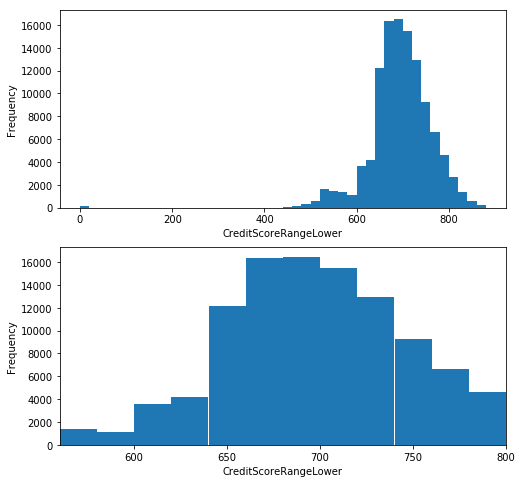

In [31]:
# Credit Score range are variables different by 20
plt.figure(figsize=[8,8])
hist_plot(2,1,1,'CreditScoreRangeLower',20)
hist_plot_lim(2,1,2,'CreditScoreRangeLower',20,560,800)

The credit score range was negatively skewed. After eliminating the outliers, most borrowers credit score ranged between 640-740 at the time of borrowing on a relatively normal distribution observered between 580 to 820.

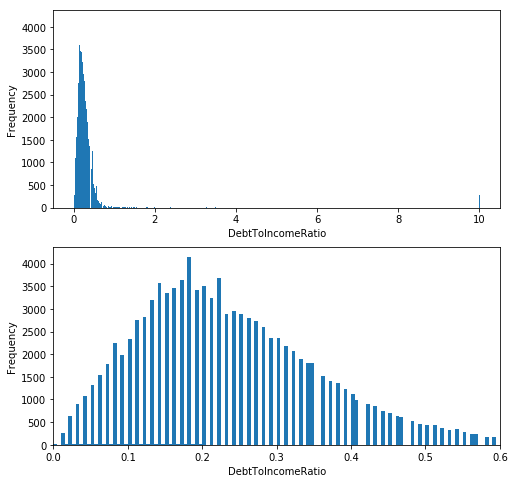

In [32]:
plt.figure(figsize=[8,8])
hist_plot(2,1,1,'DebtToIncomeRatio',0.01) # plot Debt to Income ratio
hist_plot_lim(2,1,2,'DebtToIncomeRatio',0.005,0,0.6) # plot Debt to Income ratio and remove outliers

The borrowers Debt to Income ratio is positively skewed. However, a none continous plot with normal distribution curve was observed between 0 and 0.5 after eliminating the outliers.

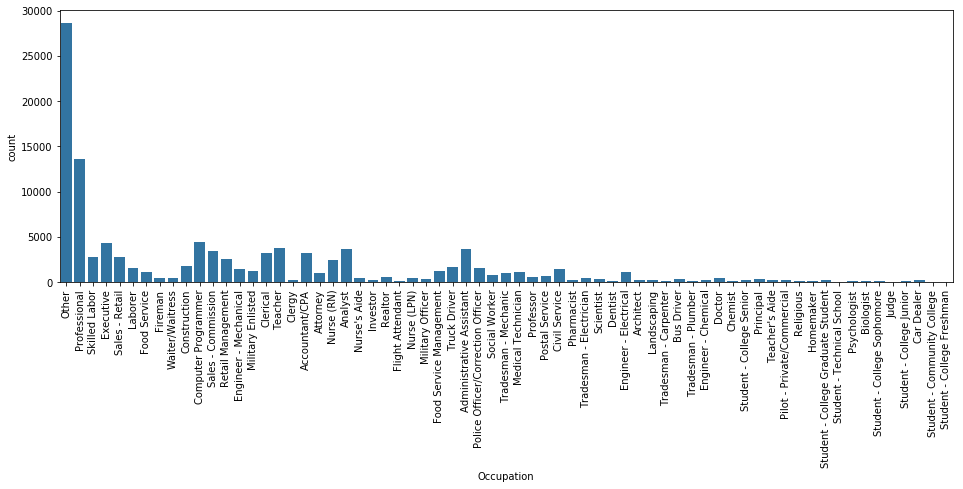

In [33]:
# Occupation of borrower
plenty_bars(16,5,1,1,1,'Occupation')

Majority of the borrowers were Professionals. Other occupations worthy of noting were; Skilled Labour, Executives, Computer Programmer, Clerical, Teacher, Accountant, Analyst and Administrative Assistant.

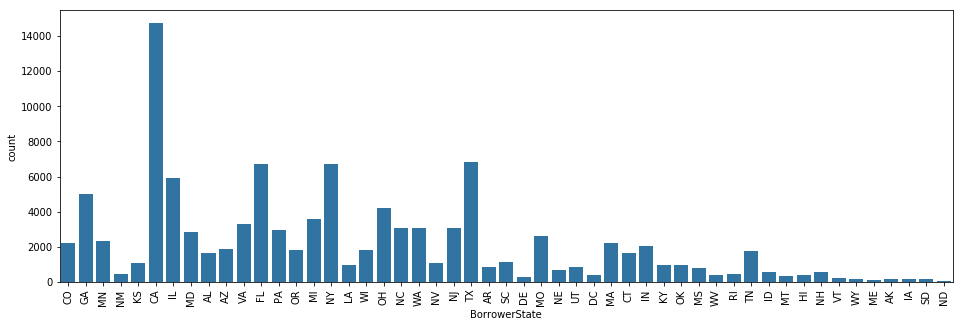

In [34]:
# State of borrower
plenty_bars(16,5,1,1,1,'BorrowerState')

Carlifonia is state with the highest number of borrowers. Other states with significant number of borrowers include; Gorgia, Illinos, Florida, New York and Texas.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The the distributions of the ratings before and after 2009 are similar, clients with the average rating (C or 4) being the highest. However, the proportion of the extreme ratings -high(AA or 7) and Low(HR or 1)- before 2009 were more as compared to after 2009. Finally, the NC(0) rating has been eliminated after 2009.

>The  amount borrowed has a right long tail with some conspicuous spikes at 4k, 5k, 10k, 15k, 20k and 25k.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the loan were to last for 36 months. Majority of borrowers are employed, while about half of them home owners. The monthly income of the borrower has a very long right tail, almost all of them were at the lower end of the monthly income. To view the disbution of what majority of the borrowers, it was plotted on a log scale and outliers were eliminated, and it was observed that majority earns between 2k-10k monthy.  

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

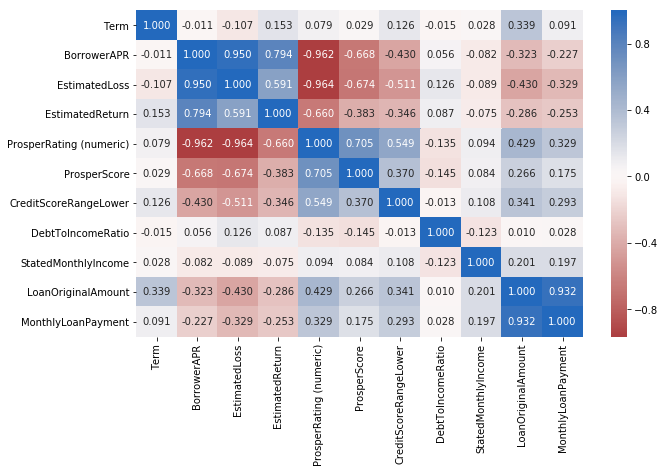

In [35]:
# Numeric variables of interest
df_var = ['Term','BorrowerAPR','EstimatedLoss', 'EstimatedReturn','ProsperRating (numeric)','ProsperScore',
           'CreditScoreRangeLower','DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount',
          'MonthlyLoanPayment']

# Plot a heatmap for the correlation between 
plt.figure(figsize = [10, 6])
sb.heatmap(df_loan[df_var].corr(), annot=True, fmt = '.3f',cmap = 'vlag_r', center = 0);

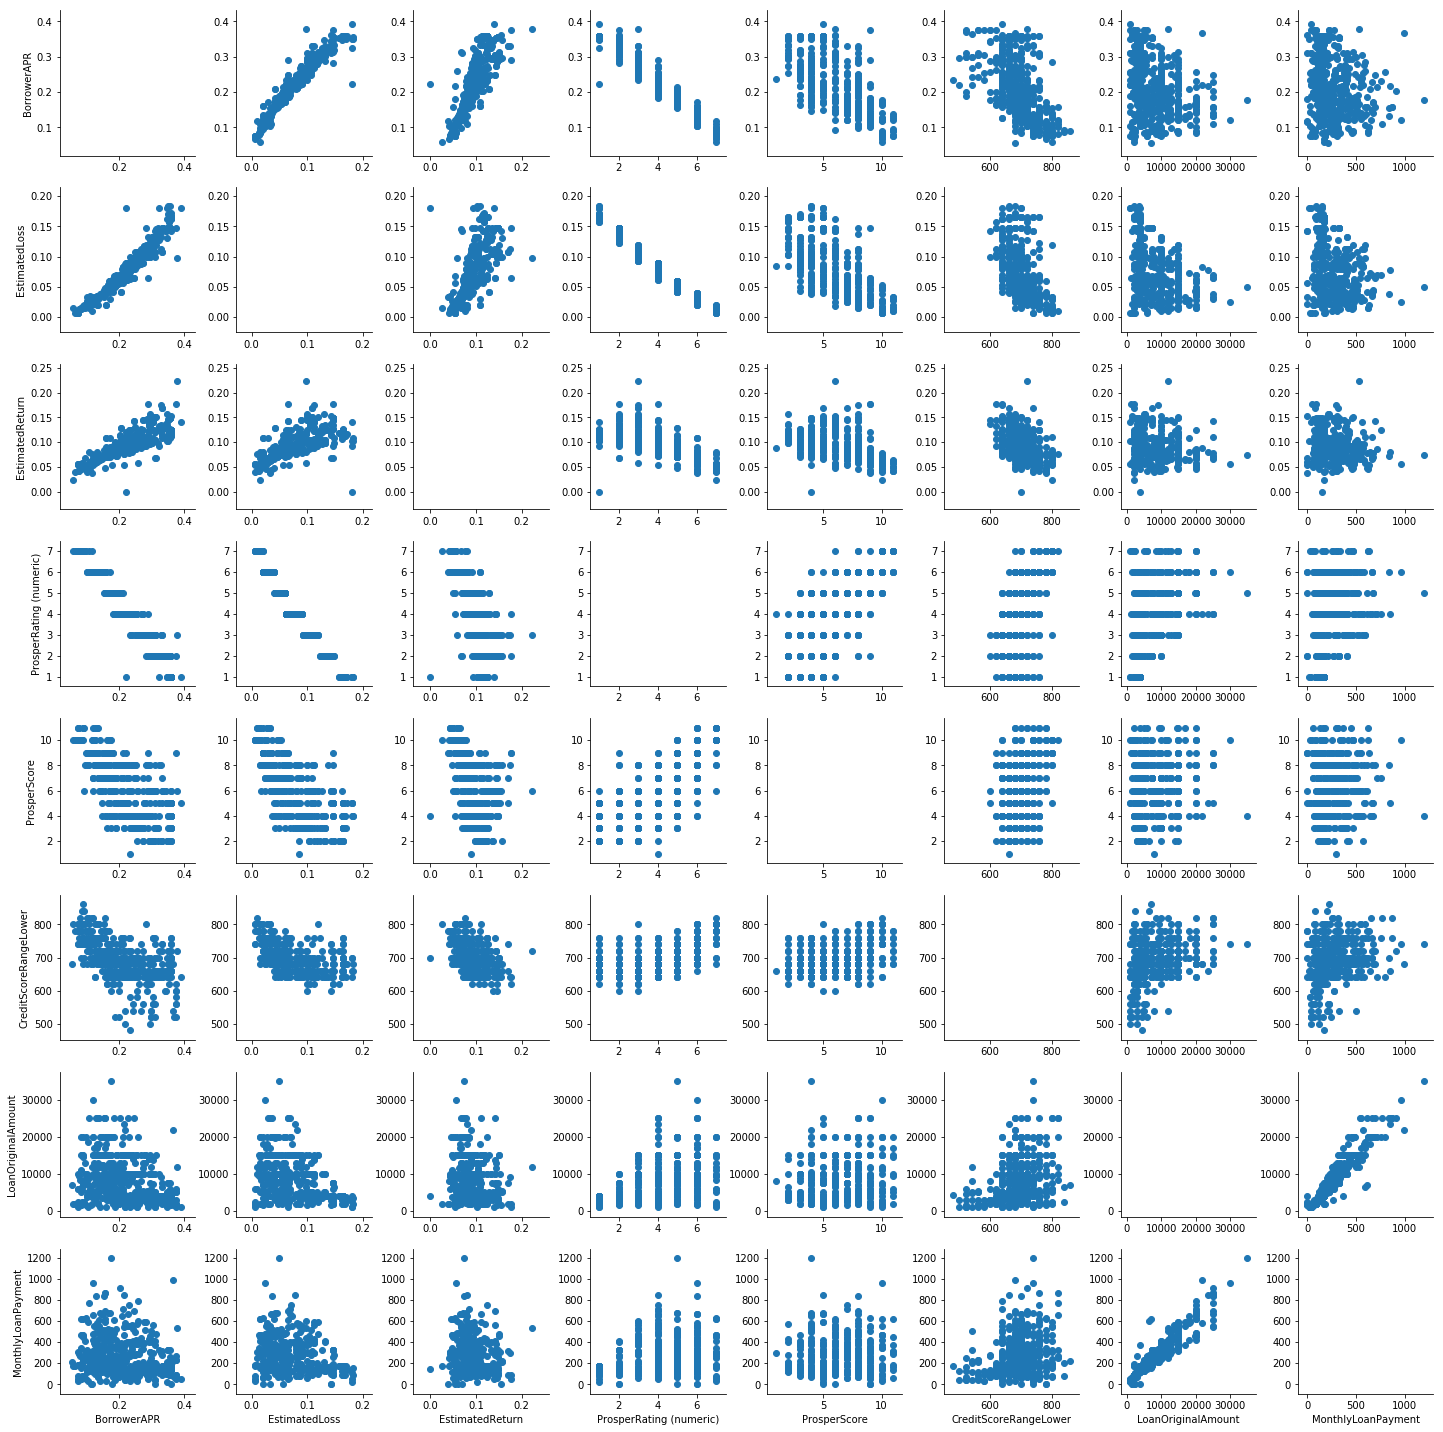

In [36]:
# plot matrix: sample 500 data so that plots are clearer and they render faster
df_sample = df_loan.sample(500)

# remove those with weak corelations to all others
quan_var = ['BorrowerAPR','EstimatedLoss', 'EstimatedReturn','ProsperRating (numeric)','ProsperScore',
           'CreditScoreRangeLower','LoanOriginalAmount','MonthlyLoanPayment']

g = sb.PairGrid(data = df_sample, vars = quan_var)
g.map_offdiag(plt.scatter);

> It was not a supprise to see a strong positive correlation between the Loan amount and the monthly payment and this will be further explored. The Stated Monthly income is not strongly correlated with any variable, so will not be explored. The scatter plot matrix showed that as the Prosper rating increases the Annual percentage Rate and Estimated Loss  decrease as it was suggested by the strong negative correlation coefficient. Others with strong correlation and linear scatter include; Estimated Loss and Borrower Annual Percentage Rate, Estimated Return and Borrower Annual Percentage Rate. 

#### Loan amount and related variables

In [37]:
# Function for plotting boxplot for loan amount and related categorical variables
def box_plot(r,c,p,x):
    plt.subplot(r,c,p)
    base_color = sb.color_palette()[0]
    sb.boxplot(data=df_loan, x=x, y='LoanOriginalAmount',color=base_color)

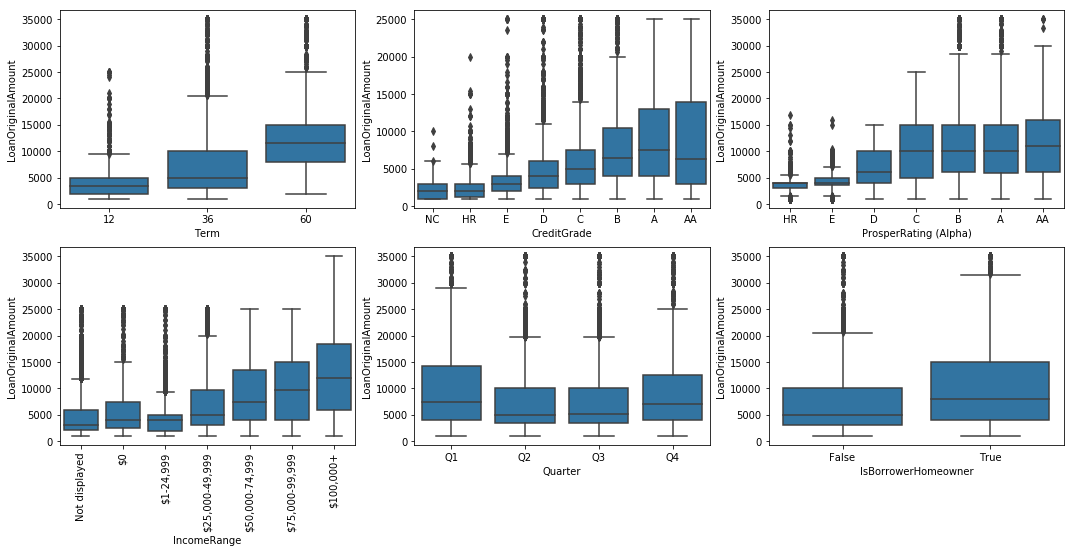

In [38]:
# ploting the boxplots for Loan Amount against the following;
plt.figure(figsize=[18,8])

box_plot(2,3,1,'Term'); # length of loan
box_plot(2,3,2,'CreditGrade'); # Rating before 2009
box_plot(2,3,3,'ProsperRating (Alpha)') # Prosper rating Rating after 2009
box_plot(2,3,4,'IncomeRange'); # Annual Income range
plt.xticks(rotation=90)
box_plot(2,3,5,'Quarter'); # Quarters
box_plot(2,3,6,'IsBorrowerHomeowner'); # Owns a home or not

> The average (median) amount borrowed increases with increase in the length of loan. It also icreases with the Rating increases, except at the AA (Rating 7) where its lower than the A (Rating 6) in the ratings before 2009 and also between Rating D-B (3-5) where it levels out after 2009. Just like against the monthly income, the average loan amount increases with increase in the annual income. It was higher in the first and last quarters of the year. The average amount money borrowed by home owners is more than that of those who do not own a home.

#### Prosper Rating amount and related variables

In [39]:
# Function for plotting multiple bar chart
def mult_plot(w,h,s,hu):
    plt.figure(figsize=[w,h])
    sb.countplot(data = df_loan, x = s, hue = hu, palette = 'Blues');

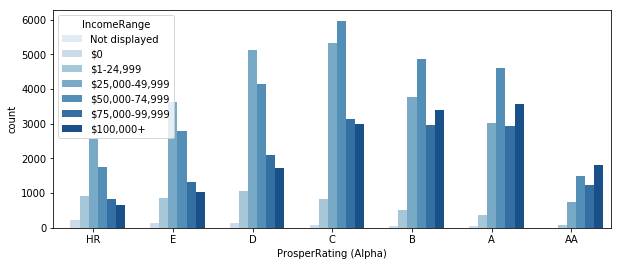

In [40]:
#for Prosper rating  against Income range
mult_plot(10,4,'ProsperRating (Alpha)','IncomeRange') 

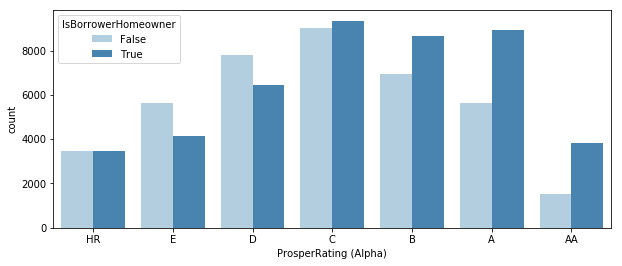

In [41]:
#for Prosper rating against owning a home or not
mult_plot(10,4,'ProsperRating (Alpha)','IsBorrowerHomeowner') 

> As the rating increases, the proportion of high income earners increases. For example, those earning 100k and above increases gradually with the rating and became highest in the AA (7) rating. Similarly, among home owners there was proportionate increase as the ratings icreases as compared to those who do not own a home. For example number of home owners with AA ratings is about double of those not ownig a home.

##### Monthly Loan Payment

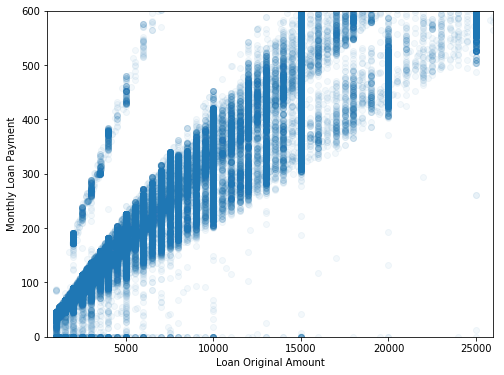

In [42]:
# Scatter plot for loan amount and monthly loan Payment
plt.figure(figsize = [8, 6])
plt.scatter(data = df_loan, y = 'MonthlyLoanPayment', x = 'LoanOriginalAmount', alpha = 1/20);
plt.ylabel('Monthly Loan Payment');
plt.xlabel('Loan Original Amount');
plt.ylim((0,600));
plt.xlim((500,26000));

> The relationship is linear but splited into three major divisions of which might be the influence of another very correlated variable.

##### Other Variables

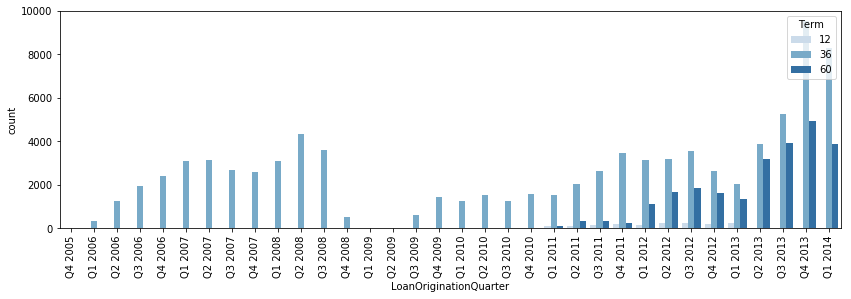

In [43]:
#for loan amout against length of loan
mult_plot(14,4,'LoanOriginationQuarter','Term') 
plt.xticks(rotation=90);

> From the last quarter of 2005 upto the end of 2010 all loan lasted for 36 months and even after that most loan still last only that long. However, there was a significant increase in the loans lasting for 60 months from 2012 to 2014.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The relationship between the loan amount and monthly Payment is linear but splited into three major lines of which might be the influence of another strongly correlated variable. The average (median) amount borrowed increases with increase in the length of loan. It also icreases with the Rating increases, except at the AA (Rating 7) where its lower than the A (Rating 6) in the ratings before 2009 and also between Rating D-B (3-5) where it levels out after 2009. Just like against the monthly income, the average loan amount increases with increase in the annual income. It was higher in the first and last quarters of the year. The average amount money borrowed by home owners is more than that of those who do not own a home.

> As the rating increases, the proportion of high income earners increases. For example, those earning 100k and above increases gradually with the rating and became highest in the AA (7) rating. Similarly, among home owners there was proportionate increase as the ratings icreases as compared to those who do not own a home. For example number of home owners with AA ratings is about double of those not ownig a home.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  From the last quarter of 2005 upto the end of 2010 all loan lasted for 36 months and even after that most loan still last only that long. However, there was a significant increase in the loans lasting for 60 months from 2012 to 2014.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


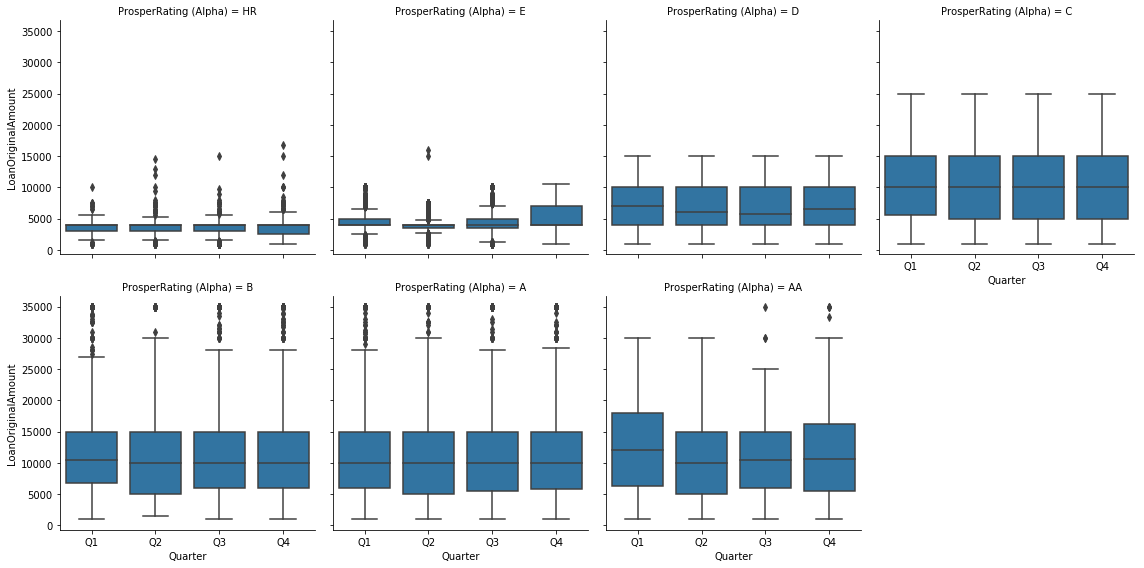

In [44]:
# To further look into the increase in loan amount in the first and last quarters, 
# what category of borrowers are responsible 

# Checking the ratings
g = sb.FacetGrid(data = df_loan, col = 'ProsperRating (Alpha)', size = 4, col_wrap=4)
g.map(sb.boxplot, 'Quarter', 'LoanOriginalAmount');

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


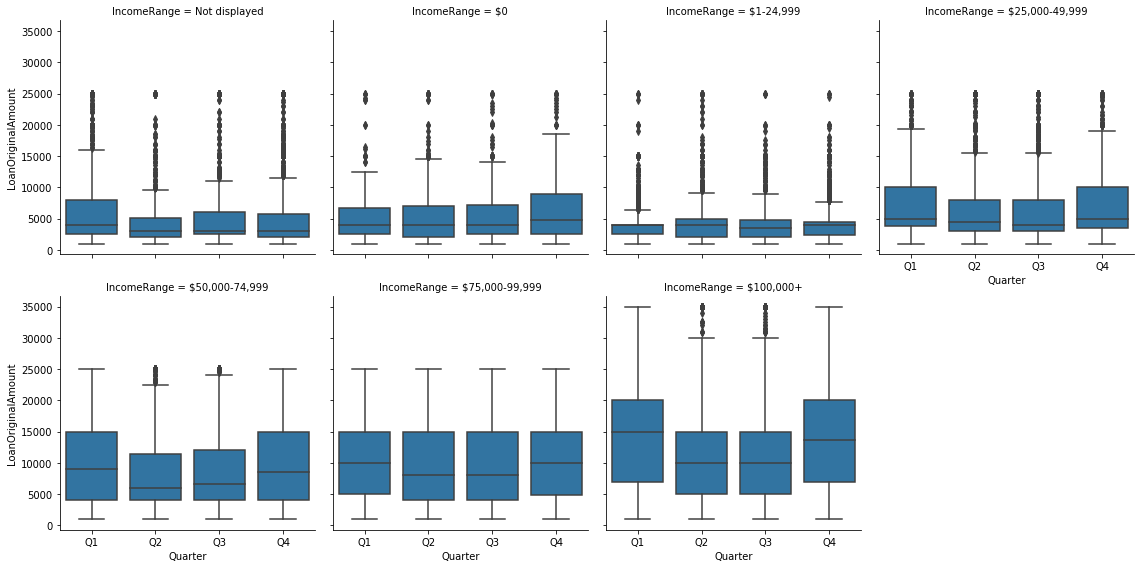

In [45]:
# To further look into the increase in loan amount in the first and last quarters, 
# what category of borrowers are responsible 

# Checking the ratings
g = sb.FacetGrid(data = df_loan, col = 'IncomeRange', size = 4, col_wrap=4)
g.map(sb.boxplot, 'Quarter', 'LoanOriginalAmount');

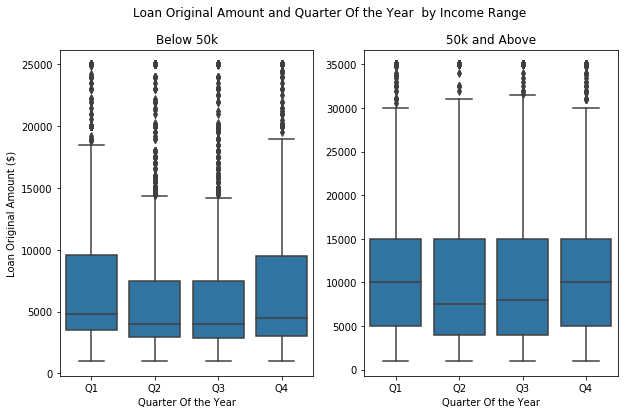

In [46]:
# create dataframes based on income range 
#below 50K
df_blw_50k = df_loan.query('IncomeRange == "$0" or IncomeRange=="$1-24,999" or IncomeRange=="$25,000-49,999"')
# 50k and above
df_50k_abv = df_loan.query('IncomeRange == "$50,000-74,999" or IncomeRange=="$$75,000-99,999" or IncomeRange=="$100,000+"')

# plotting boxplot based on Income Range
fig, ax = plt.subplots(ncols = 2, figsize = [10,6])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_blw_50k, y = 'LoanOriginalAmount', x = 'Quarter', ax = ax[0],color = base_color)
ax[0].set_xlabel("Quarter Of the Year")
ax[0].set_ylabel("Loan Original Amount ($)")
ax[0].set_title('Below 50k')
sb.boxplot(data = df_50k_abv, y = 'LoanOriginalAmount', x = 'Quarter', ax = ax[1], color = base_color)
ax[1].set_xlabel("Quarter Of the Year")
ax[1].set_title('50k and Above')
ax[1].set_ylabel("")
fig.suptitle('Loan Original Amount and Quarter Of the Year  by Income Range');

> The increase in Loan amount in the first and last quarters was not much related to the rating, though there was an increase in the first quarter among those with AA rating.

>Those who earn 50k and above per annum borrow more money at the first and last quarters.

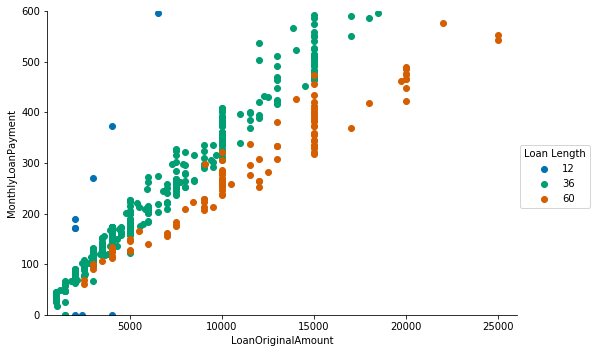

In [47]:
# To avoid overploting, the 500 sampled data is used to plot the same scatter plot, but now with a third variable.
# since loan length(Term) is the only variable with 3 categories, there is high possibility each of 
# the line represent something different

g = sb.FacetGrid(data = df_sample, hue = 'Term', size = 5, palette = 'colorblind', aspect=1.5)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment')
plt.ylim((0,600));
plt.xlim((500,26000));
g.add_legend(title='Loan Length');

> The scatter plot showed a linear relationship (i.e as loan amount increases, monthly payment also increase) but splited into three major divisions. Using color encoding to delineate the length of loan in the scatter plot, it showed a strong relationship with the divisions, where monthly payment icreases with loan amount and decreases with the loan lenth.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The scatter plot showed a linear relationship (i.e as loan amount increases, monthly payment also increase) but splited into three major lines. Using color encoding to delineate the length of loan in the scatter plot, it showed that monthly payment icreases with loan amount and decreases with the loan lenth.

>The increase in Loan amount in the first and last quarters was not much related to the rating.
Those who earn 50k and above per annum borrow more money at the first and last quarters.

### Were there any interesting or surprising interactions between features?

> Those who earn 50k and above per annum borrow more money at the first and last quarters.

## Conclusions
In this exploration, I found there was a strong relationship between the Prosper rating and the Loan amount, Prosper rating and the Income of the borrower. Others include; Loan amount and Length of the loan, Loan amount and the quarter the Loan was borrowed. Those with high income have better ratings. The average loan amount borrowed in the first and last quarters were higher than those in the middle half of the year and When I isolated the ralatinship between the loan amount and the quarter across each income range, it showed that those who earn 50k and above borrowed more money in the first and the last quarter. Also, home owners has better Proper Rating than those who own no home. I verified the relationship between monthly payment and loan amount. The scatter plot showed a linear relationship (i.e as loan amount increases, monthly payment also increase) but splited into three major divisions. Using color encoding to delineate the length of loan in the scatter plot, it showed that monthly payment icreases with loan amount and decreases with the loan lenth.

Outside of the main variables of interest, I also verified the relationship between length of loan and the quarter. From the last quarter of 2005 upto the end of 2010 all loan lasted for 36 months and even after. However, there was a significant increase in the loans lasting for 60 months from 2012 to 2014.